#Loading libraries and data

In [ ]:
import csv
import math
import random
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import plotly.express as px
import time
import random
from scipy.stats import beta

In [ ]:
file_id = '1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'purchases_final_PLEASE_TY.csv'
gdown.download(url, output, quiet=False)


file_id = '1dCM377PU25vXxyYcNbcbmRVdZJBY1blv'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'customers_final_PLEASE_TY.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS
From (redirected): https://drive.google.com/uc?id=1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS&confirm=t&uuid=3120f8ca-a179-49ef-a6da-065a83d79ff8
To: /content/purchases_final_PLEASE_TY.csv
100%|██████████| 272M/272M [00:06<00:00, 42.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dCM377PU25vXxyYcNbcbmRVdZJBY1blv
To: /content/customers_final_PLEASE_TY.csv
100%|██████████| 828k/828k [00:00<00:00, 91.0MB/s]


'customers_final_PLEASE_TY.csv'

In [ ]:
customers = pd.read_csv('customers_final_PLEASE_TY.csv')
purchases = pd.read_csv('purchases_final_PLEASE_TY.csv')

In [ ]:
p = purchases.copy()
p.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category,Prime,Discounts,Express Shipping
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics,1,0.00,1
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics,1,0.00,1
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN,1,0.00,1
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining,1,0.05,1
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care,1,0.05,1


In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530763 entries, 0 to 1530762
Data columns (total 11 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Order Date                1530763 non-null  object 
 1   Purchase Price Per Unit   1530763 non-null  float64
 2   Quantity                  1530763 non-null  int64  
 3   Shipping Address State    1455701 non-null  object 
 4   Title                     1449174 non-null  object 
 5   ASIN/ISBN (Product Code)  1530137 non-null  object 
 6   Survey ResponseID         1530763 non-null  object 
 7   Category                  1449737 non-null  object 
 8   Prime                     1530763 non-null  int64  
 9   Discounts                 1530763 non-null  float64
 10  Express Shipping          1530763 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 128.5+ MB


In [ ]:
customers.head()

,Survey ResponseID,Prime,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,Cart Abandonment Rate,Check Review,Refund rate,Time in Cart,Time on Page,RFM
0,R_03aEbghUILs9NxD,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.428571,0.733693,0,0.243994,7.039021,0.469268,111
1,R_06RZP9pS7kONINr,1,0.033368,0.032189,0.000000,0.000000,0.0,0.0,1.000000,0.709685,1,0.170417,45.151821,3.010121,323
2,R_085qq7w0pkhowox,0,0.000000,0.000000,0.006171,0.000000,0.0,0.0,0.475410,0.719513,1,0.306721,19.751185,1.316746,322
3,R_08uYA7fb4unHGkF,1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.645122,0,0.118960,13.694138,0.912943,212
4,R_0BrMxYYMHVMOBEJ,0,0.000000,0.042679,0.000000,0.021435,0.0,0.0,0.500000,0.832793,0,0.343723,2.544373,0.169625,211


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey ResponseID      4923 non-null   object 
 1   Prime                  4923 non-null   int64  
 2   Email CTC              4923 non-null   float64
 3   Display Ad CTC         4923 non-null   float64
 4   Video Ad CTC           4923 non-null   float64
 5   Search Engine Ad CTC   4923 non-null   float64
 6   Social Media Ad CTC    4923 non-null   float64
 7   Average CTC            4923 non-null   float64
 8   Express Shipping       4902 non-null   float64
 9   Cart Abandonment Rate  4923 non-null   float64
 10  Check Review           4923 non-null   int64  
 11  Refund rate            4923 non-null   float64
 12  Time in Cart           4923 non-null   float64
 13  Time on Page           4923 non-null   float64
 14  RFM                    4923 non-null   int64  
dtypes: f

#EDA

## Whether customers are Prime members

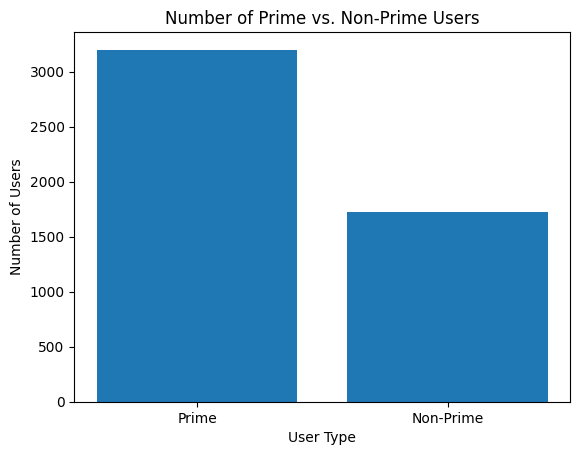

In [ ]:
prime_users = p[p['Prime'] == 1]
prime_users = prime_users['Survey ResponseID'].drop_duplicates()

non_prime_users = p[p['Prime'] == 0]
non_prime_users = non_prime_users['Survey ResponseID'].drop_duplicates()

num_prime_users = len(prime_users)
num_non_prime_users = len(non_prime_users)
user_types = ['Prime', 'Non-Prime']
user_counts = [num_prime_users, num_non_prime_users]

plt.bar(user_types, user_counts)
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Number of Prime vs. Non-Prime Users')
plt.show()

In [ ]:
len(prime_users) / len(customers)

0.6500101564086939

65% of customers are Amazon Prime users, whereas 35% are not.

## Cart Abandonment rate

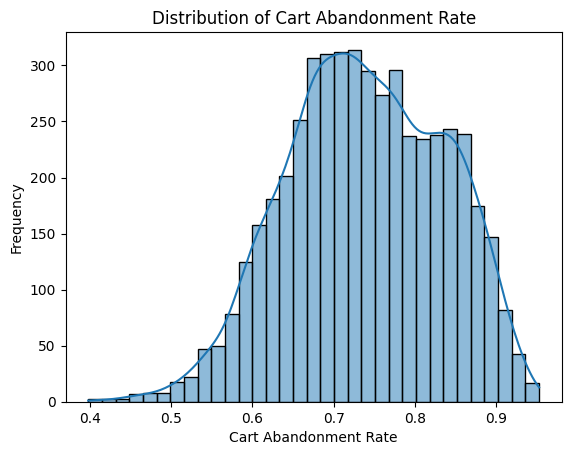

In [ ]:
sns.histplot(customers['Cart Abandonment Rate'], kde=True)
plt.xlabel('Cart Abandonment Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Cart Abandonment Rate')
plt.show()

In [ ]:
customers['Cart Abandonment Rate'].median()

0.7372327897628862

Overall cart abandonment rate seems to be quite high, with almost everyone choosing to abandon their carts more than half of the time. ~74% of carts are abandoned.

## Whether customers check Product Reviews

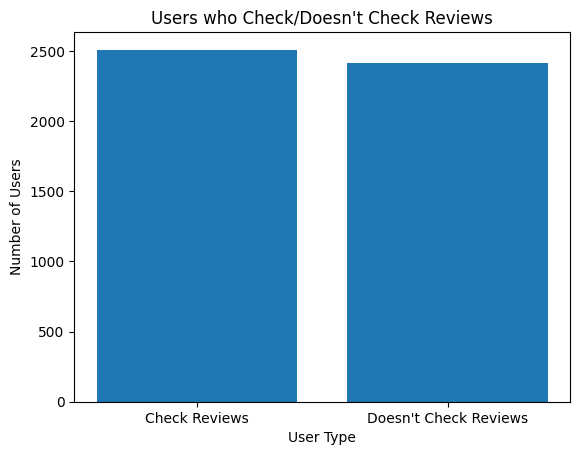

In [ ]:
check_users = customers[customers['Check Review'] == 1]
check_users = check_users['Survey ResponseID'].drop_duplicates()

no_check_users = customers[customers['Check Review'] == 0]
no_check_users = no_check_users['Survey ResponseID'].drop_duplicates()

num_check_users = len(check_users)
num_no_check_users = len(no_check_users)
user_types_reviews = ['Check Reviews', 'Doesn\'t Check Reviews']
user_counts_reviews = [num_check_users, num_no_check_users]

plt.bar(user_types_reviews, user_counts_reviews)
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Users who Check/Doesn\'t Check Reviews')
plt.show()

## Percentage of Discounted Items Bought

In [ ]:
p['discount_applied'] = p['Discounts'].apply(lambda x: 1 if x > 0 else 0)

discount_counts = p.groupby('Survey ResponseID')['discount_applied'].value_counts().unstack(fill_value=0)
discount_counts.columns = ['no_discount', 'with_discount']
discount_counts['total_items'] = discount_counts['with_discount'] + discount_counts['no_discount']
discount_counts['pct_discount'] = discount_counts['with_discount'] / discount_counts['total_items']
discount_counts.head(20)

,no_discount,with_discount,total_items,pct_discount
Survey ResponseID,,,,
R_01vNIayewjIIKMF,4,3,7,0.428571
R_037XK72IZBJyF69,331,237,568,0.417254
R_03aEbghUILs9NxD,14,18,32,0.562500
R_06RZP9pS7kONINr,220,186,406,0.458128
R_06d9ULxrBmkwSTn,62,44,106,0.415094
R_07oHvj3bLVVRCRb,15,12,27,0.444444
R_085qq7w0pkhowox,157,131,288,0.454861
R_08tF4u5YMrmEJ4l,4,3,7,0.428571
R_08uYA7fb4unHGkF,55,34,89,0.382022


In [ ]:
keep = discount_counts[discount_counts['total_items'] > 5]

discount_counts['keep discounts'] = discount_counts.index.isin(keep.index).astype(int)
discount_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4923 entries, R_01vNIayewjIIKMF to R_zfqnsBzlOAKibzb
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   no_discount     4923 non-null   int64  
 1   with_discount   4923 non-null   int64  
 2   total_items     4923 non-null   int64  
 3   pct_discount    4923 non-null   float64
 4   keep discounts  4923 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 359.8+ KB


In [ ]:
customers['Pct Discount'] = pd.merge(customers, discount_counts, on='Survey ResponseID', how='left')['pct_discount']
customers['Keep Discount'] = pd.merge(customers, discount_counts, on='Survey ResponseID', how='left')['keep discounts']
p = p.drop(columns=['discount_applied'])
customers.head()

,Survey ResponseID,Prime,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,Cart Abandonment Rate,Check Review,Refund rate,Time in Cart,Time on Page,RFM,Pct Discount,Keep Discount
0,R_03aEbghUILs9NxD,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.428571,0.733693,0,0.243994,7.039021,0.469268,111,0.562500,1
1,R_06RZP9pS7kONINr,1,0.033368,0.032189,0.000000,0.000000,0.0,0.0,1.000000,0.709685,1,0.170417,45.151821,3.010121,323,0.458128,1
2,R_085qq7w0pkhowox,0,0.000000,0.000000,0.006171,0.000000,0.0,0.0,0.475410,0.719513,1,0.306721,19.751185,1.316746,322,0.454861,1
3,R_08uYA7fb4unHGkF,1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.645122,0,0.118960,13.694138,0.912943,212,0.382022,1
4,R_0BrMxYYMHVMOBEJ,0,0.000000,0.042679,0.000000,0.021435,0.0,0.0,0.500000,0.832793,0,0.343723,2.544373,0.169625,211,0.380952,1


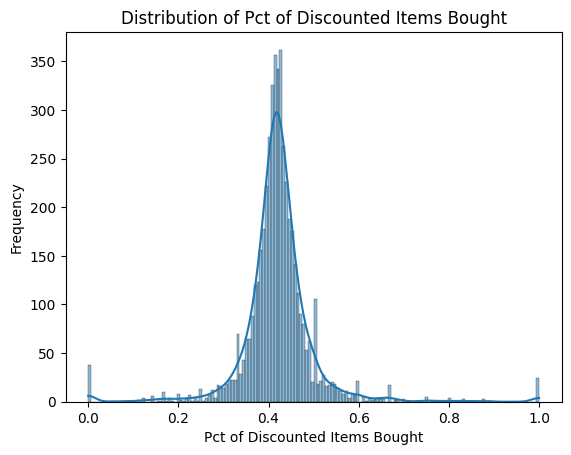

In [ ]:
sns.histplot(customers['Pct Discount'], kde=True)
plt.xlabel('Pct of Discounted Items Bought')
plt.ylabel('Frequency')
plt.title('Distribution of Pct of Discounted Items Bought')
plt.show()

## Refund / Return Rate

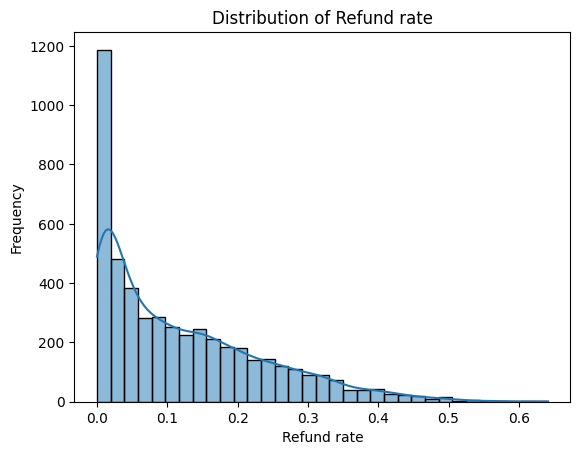

In [ ]:
sns.histplot(customers['Refund rate'], kde=True)
plt.xlabel('Refund rate')
plt.ylabel('Frequency')
plt.title('Distribution of Refund rate')
plt.show()

## Category

<Axes: xlabel='pct of category', ylabel='Count'>

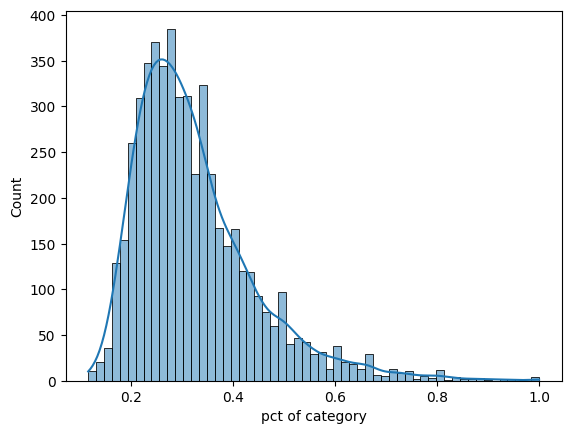

In [ ]:
#Most popular category for each customer
purchases['Total items bought'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform('nunique')
purchases['Total items bought per category'] = purchases.groupby(['Survey ResponseID','Category'])['Order Date'].transform('nunique')
purchases['Most items category'] = purchases.groupby(['Survey ResponseID'])['Total items bought per category'].transform('max')
purchases = purchases[purchases['Total items bought per category'] == purchases['Most items category']]
purchases_filtered = purchases[['Total items bought','Survey ResponseID','Category','Most items category']].drop_duplicates()
purchases_filtered['pct of category'] = purchases_filtered['Most items category']/purchases_filtered['Total items bought']

purchases_filtered = purchases_filtered[purchases_filtered['Total items bought'] >= 5]

sns.histplot(purchases_filtered['pct of category'], kde=True)

In [ ]:
purchases_filtered = purchases_filtered[purchases_filtered['pct of category'] > 0.5]
purchases_filtered = purchases_filtered.drop(columns=['Total items bought','pct of category', 'Most items category'])
customers = pd.merge(customers, purchases_filtered, on='Survey ResponseID', how='left')
customers.head()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4926 entries, 0 to 4925
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey ResponseID      4926 non-null   object 
 1   Prime                  4926 non-null   int64  
 2   Email CTC              4926 non-null   float64
 3   Display Ad CTC         4926 non-null   float64
 4   Video Ad CTC           4926 non-null   float64
 5   Search Engine Ad CTC   4926 non-null   float64
 6   Social Media Ad CTC    4926 non-null   float64
 7   Average CTC            4926 non-null   float64
 8   Express Shipping       4905 non-null   float64
 9   Cart Abandonment Rate  4926 non-null   float64
 10  Check Review           4926 non-null   int64  
 11  Refund rate            4926 non-null   float64
 12  Time in Cart           4926 non-null   float64
 13  Time on Page           4926 non-null   float64
 14  RFM                    4926 non-null   int64  
 15  Pct 

In [ ]:
# We have 4934 IDs instead of 4933: One dude has a duplicated entry bc he has 2 categories tied for most purchased category
duplicates = customers[customers['Survey ResponseID'].duplicated(keep=False)]
print(duplicates)

      Survey ResponseID  Prime  Email CTC  Display Ad CTC  Video Ad CTC  \
4260  R_3GdnyGwbVF0dSiX      0   0.000000         0.06432           0.0   
4261  R_3GdnyGwbVF0dSiX      0   0.000000         0.06432           0.0   
4439  R_3k85Clfjw382OSO      0   0.036483         0.00000           0.0   
4440  R_3k85Clfjw382OSO      0   0.036483         0.00000           0.0   
4902  R_xc3pVSyq4it2sr7      0   0.000000         0.00000           0.0   
4903  R_xc3pVSyq4it2sr7      0   0.000000         0.00000           0.0   

      Search Engine Ad CTC  Social Media Ad CTC  Average CTC  \
4260                   0.0             0.000000     0.000000   
4261                   0.0             0.000000     0.000000   
4439                   0.0             0.097836     0.028398   
4440                   0.0             0.097836     0.028398   
4902                   0.0             0.075602     0.000000   
4903                   0.0             0.075602     0.000000   

      Express Shipping  C

In [ ]:
customers = customers.drop(customers[customers.duplicated(subset='Survey ResponseID', keep='first')].sample(frac=1).index)
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4923 entries, 0 to 4925
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey ResponseID      4923 non-null   object 
 1   Prime                  4923 non-null   int64  
 2   Email CTC              4923 non-null   float64
 3   Display Ad CTC         4923 non-null   float64
 4   Video Ad CTC           4923 non-null   float64
 5   Search Engine Ad CTC   4923 non-null   float64
 6   Social Media Ad CTC    4923 non-null   float64
 7   Average CTC            4923 non-null   float64
 8   Express Shipping       4902 non-null   float64
 9   Cart Abandonment Rate  4923 non-null   float64
 10  Check Review           4923 non-null   int64  
 11  Refund rate            4923 non-null   float64
 12  Time in Cart           4923 non-null   float64
 13  Time on Page           4923 non-null   float64
 14  RFM                    4923 non-null   int64  
 15  Pct Disco

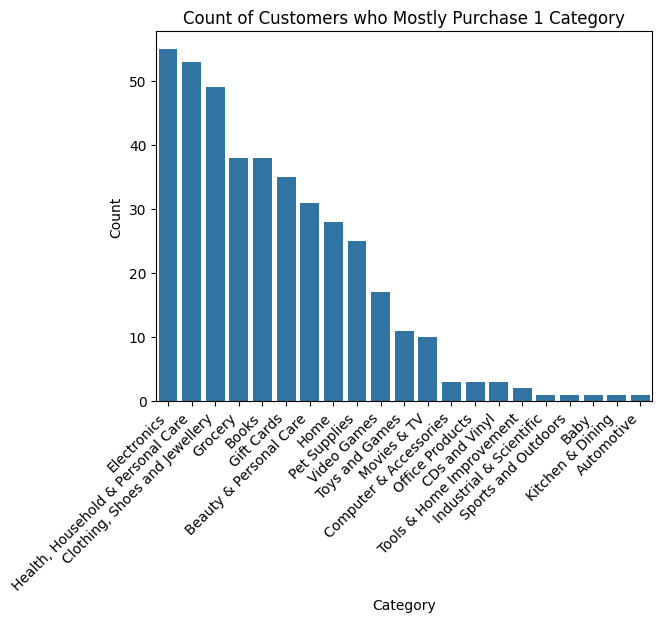

In [ ]:
counts = customers['Category'].value_counts().dropna()

sns.barplot(x = counts.index, y=counts.values)
plt.title('Count of Customers who Mostly Purchase 1 Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Paid for express shipping:

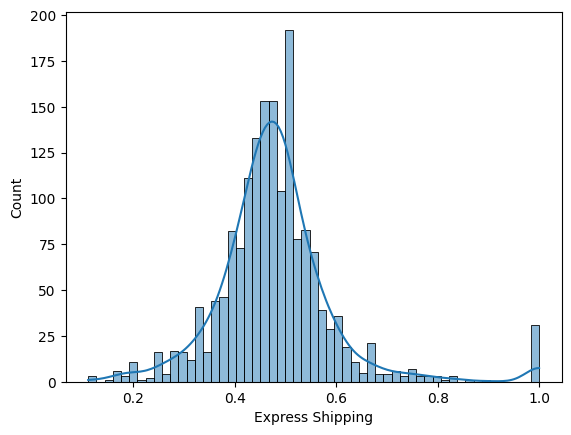

In [ ]:
#Plot of % of orders bought with express shipping for non-prime customers
sns.histplot(customers[customers['Prime'] == 0]['Express Shipping'], kde = True)
plt.show()

## Click-to-conversion (CTC) Rates

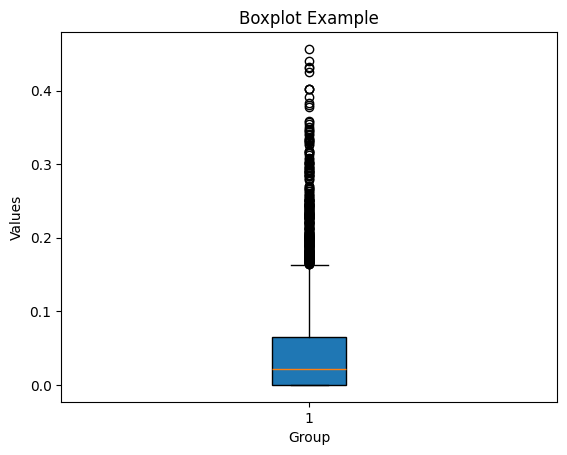

In [ ]:
plt.boxplot(customers['Email CTC'], vert=True, patch_artist=True)
plt.title('Boxplot Example')
plt.xlabel('Group')
plt.ylabel('Values')
plt.show()

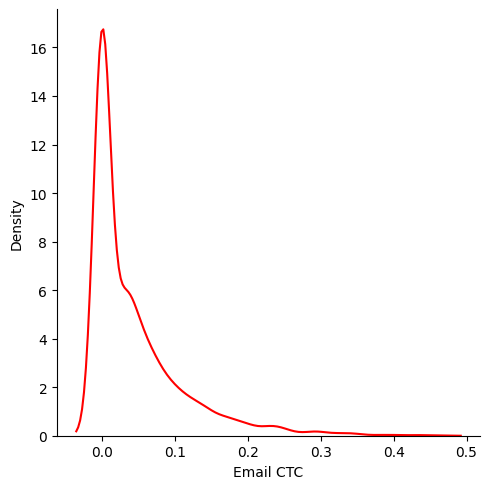

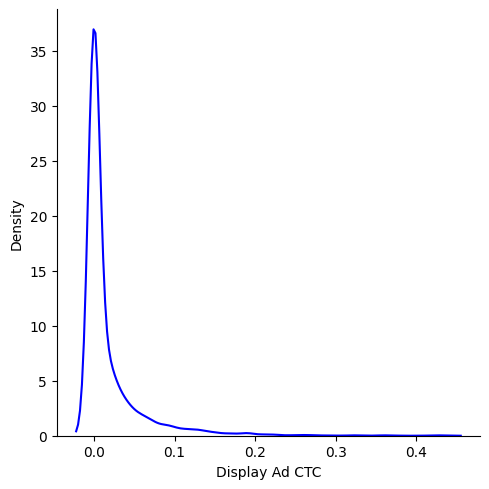

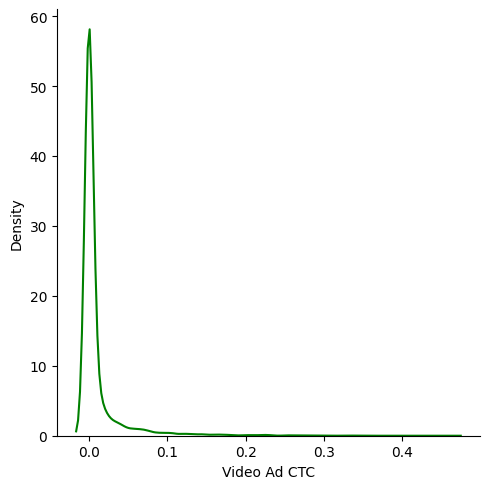

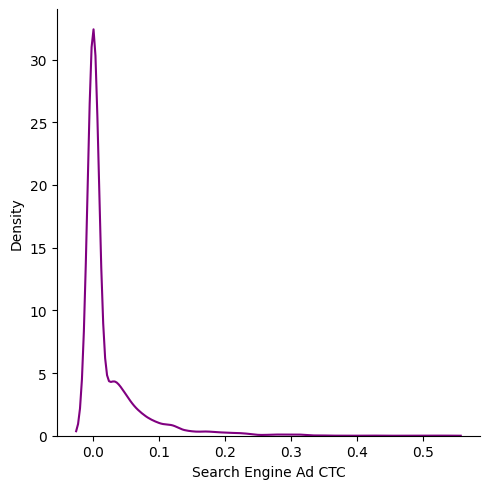

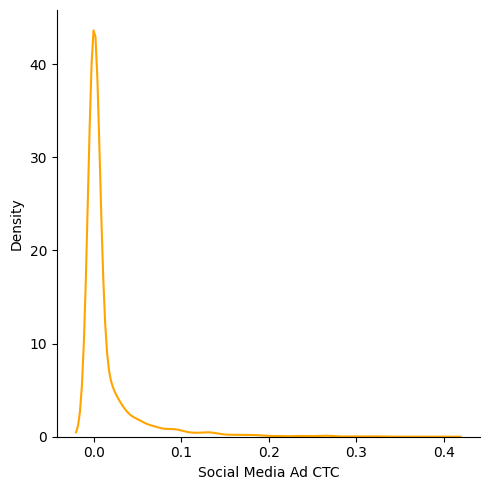

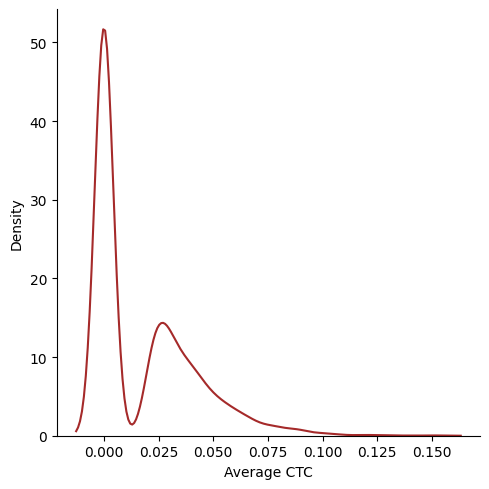

In [ ]:
#distribution of CTC for different marketing channels
sns.displot(customers['Email CTC'], kind = 'kde', color = "red")
sns.displot(customers['Display Ad CTC'], kind = 'kde', color = "blue")
sns.displot(customers['Video Ad CTC'], kind = 'kde', color = "green")
sns.displot(customers['Search Engine Ad CTC'], kind = 'kde', color = "purple")
sns.displot(customers['Social Media Ad CTC'], kind = 'kde', color = "orange")
sns.displot(customers['Average CTC'], kind = 'kde', color = "brown")
plt.show()

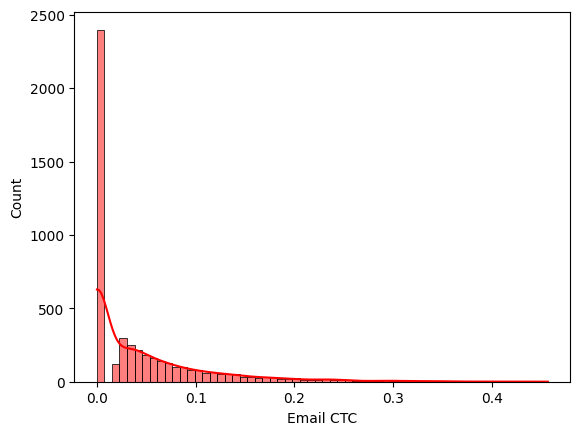

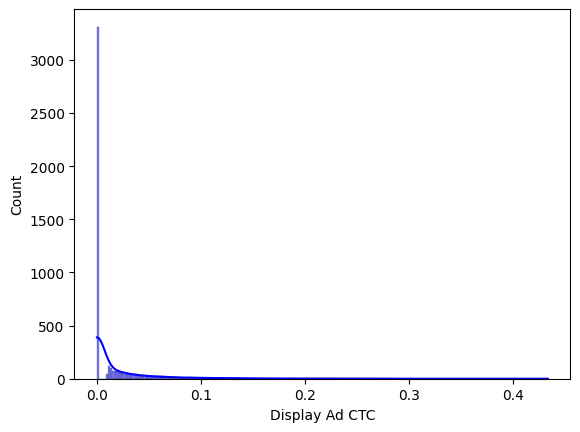

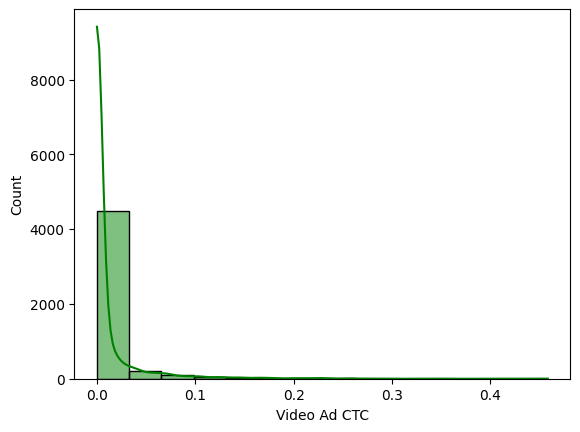

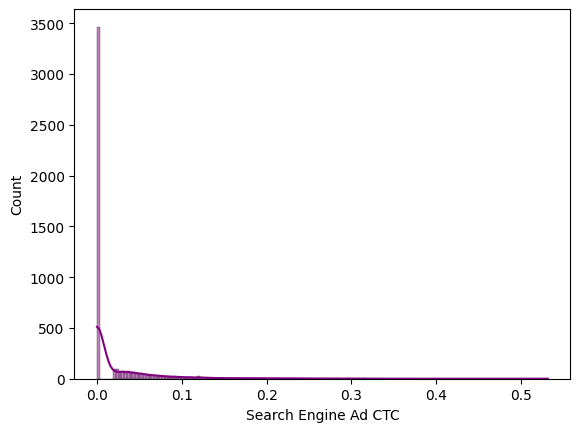

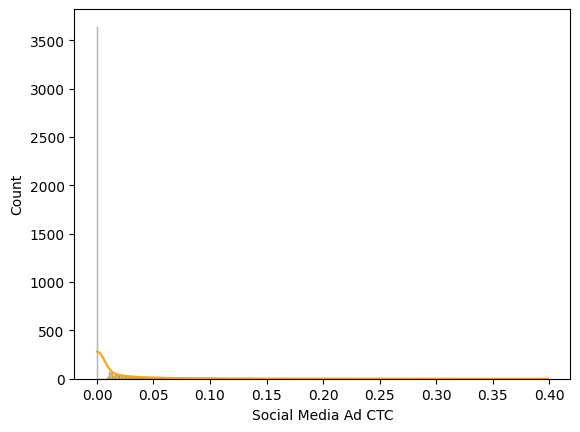

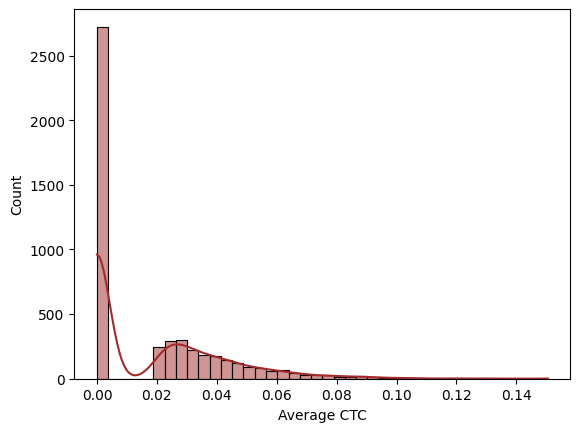

In [ ]:
sns.histplot(customers['Email CTC'], kde = True, color = "red")
plt.show()
sns.histplot(customers['Display Ad CTC'], kde = True, color = "blue")
plt.show()
sns.histplot(customers['Video Ad CTC'], kde = True, color = "green")
plt.show()
sns.histplot(customers['Search Engine Ad CTC'], kde = True, color = "purple")
plt.show()
sns.histplot(customers['Social Media Ad CTC'], kde = True, color = "orange")
plt.show()
sns.histplot(customers['Average CTC'], kde = True, color = "brown")
plt.show()

## Time in Cart

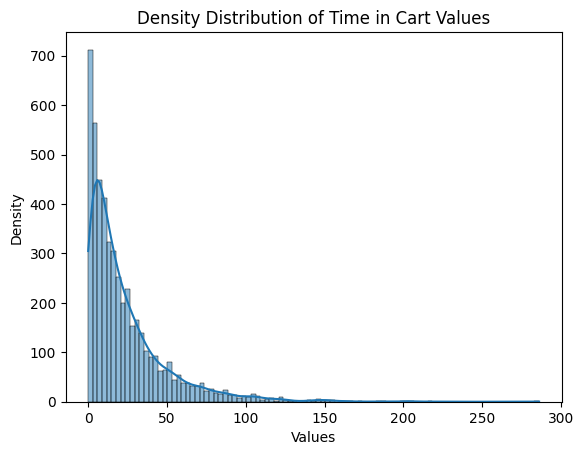

In [ ]:
#sns.kdeplot(customers['Time in Cart'], fill=True)
sns.histplot(customers['Time in Cart'], kde=True)
plt.title('Density Distribution of Time in Cart Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

## Time on Page

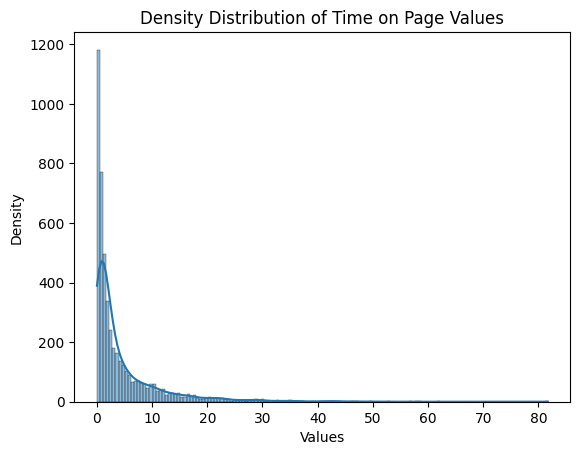

In [ ]:
#sns.kdeplot(customers['Time on Page'], fill=True)
sns.histplot(customers['Time on Page'], kde=True)
plt.title('Density Distribution of Time on Page Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

In [ ]:
customers.head()

,Survey ResponseID,Prime,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,Cart Abandonment Rate,Check Review,Refund rate,Time in Cart,Time on Page,RFM,Pct Discount,Keep Discount,Category
0,R_03aEbghUILs9NxD,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.428571,0.733693,0,0.243994,7.039021,0.469268,111,0.562500,1,NaN
1,R_06RZP9pS7kONINr,1,0.033368,0.032189,0.000000,0.000000,0.0,0.0,1.000000,0.709685,1,0.170417,45.151821,3.010121,323,0.458128,1,NaN
2,R_085qq7w0pkhowox,0,0.000000,0.000000,0.006171,0.000000,0.0,0.0,0.475410,0.719513,1,0.306721,19.751185,1.316746,322,0.454861,1,NaN
3,R_08uYA7fb4unHGkF,1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.645122,0,0.118960,13.694138,0.912943,212,0.382022,1,NaN
4,R_0BrMxYYMHVMOBEJ,0,0.000000,0.042679,0.000000,0.021435,0.0,0.0,0.500000,0.832793,0,0.343723,2.544373,0.169625,211,0.380952,1,NaN


In [ ]:
p.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category,Prime,Discounts,Express Shipping
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics,1,0.00,1
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics,1,0.00,1
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN,1,0.00,1
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining,1,0.05,1
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care,1,0.05,1


In [ ]:
customers.to_csv('Q2_customers.csv', index=False)
from google.colab import files
files.download("Q2_customers.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##FM Matrix

In [ ]:
#Lifetime RFM
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'], format='%Y-%m-%d')
purchases = purchases[purchases['Order Date'] < pd.to_datetime('2022-11-01', format='%Y-%m-%d')]
purchases['Year'] = purchases['Order Date'].dt.year
purchases['Month'] = purchases['Order Date'].dt.month
purchases['Recency'] = pd.to_datetime('2022-11-01', format='%Y-%m-%d') - purchases.groupby(['Survey ResponseID'])['Order Date'].transform("max")
#Frequency need to change to number of purchases/month
purchases['Frequency'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform('nunique')
purchases['Order value'] = purchases['Quantity'] * purchases['Purchase Price Per Unit']
purchases['Monetary'] = purchases.groupby(['Survey ResponseID'])['Order value'].transform('sum')
purchases = purchases[['Recency','Frequency','Monetary','Survey ResponseID']]
purchases = purchases.drop_duplicates()
purchases['Recency'] = purchases['Recency'].dt.days
freq_medium = purchases['Frequency'].quantile(0.5)
freq_high = purchases['Frequency'].quantile(0.75)
monetary_medium = purchases['Monetary'].quantile(0.5)
monetary_high = purchases['Monetary'].quantile(0.75)
#print(purchases['Frequency'].describe())
#print(purchases['Monetary'].describe())
conditions_frequency = [
    purchases['Frequency'] <= freq_medium,
    (purchases['Frequency'] > freq_medium) & (purchases['Frequency'] < freq_high),
    purchases['Frequency'] >= freq_high
]

conditions_monetary = [
    purchases['Monetary'] <= monetary_medium,
    (purchases['Monetary'] > monetary_medium) & (purchases['Monetary'] < monetary_high),
    purchases['Monetary'] >= monetary_high
]
choices_FM = [1,2,3]
purchases['Frequency_category'] = np.select(conditions_frequency, choices_FM, default= 'Unknown')
purchases['Monetary_category'] = np.select(conditions_monetary, choices_FM, default= 'Unknown')
purchases['FM'] = purchases['Frequency_category'].astype(str) + purchases['Monetary_category'].astype(str)
print(purchases['FM'].value_counts().sort_index(ascending= False))
lifetime_fm = purchases[['Survey ResponseID','FM']].drop_duplicates()
fm_counts = [
    [sum(purchases['FM'] == "31"), sum(purchases['FM'] == "32"), sum(purchases['FM'] == "33")],
    [sum(purchases['FM'] == "21"), sum(purchases['FM'] == "22"), sum(purchases['FM'] == "23")],
    [sum(purchases['FM'] == "11"), sum(purchases['FM'] == "12"), sum(purchases['FM'] == "13")]
]
fm_matrix = np.array(fm_counts)
total_count = fm_matrix.sum()
percentages = (fm_matrix / total_count * 100).round(2)
annot_labels = np.array([f"{count}\n{percent:.2f}%"
                         for count_row, percent_row in zip(fm_matrix, percentages)
                         for count, percent in zip(count_row, percent_row)]).reshape(fm_matrix.shape)

plt.figure(figsize=(6, 6))
sns.heatmap(fm_matrix, annot=annot_labels, fmt="", cmap="viridis",
            xticklabels=['Low M', 'Mid M', 'High M'],
            yticklabels=['High F', 'Mid F', 'Low F'])
plt.title("FM Matrix for Customers")
plt.xlabel("Monetary (M)")
plt.ylabel("Frequency (F)")
plt.show()

KeyError: 'Order Date'